## Import Dependancies

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#from sklearn.metrics import confusion_matrix, classification_report

In [13]:
# File to Load (Remember to Change These)
data = "../Resources/FINAL_CLEAN_FILE.csv"

# read to dataframe
data_df = pd.read_csv(data)
data_df.head()

,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,SEVERITY_LEVEL,HOSPITAL,AGE_YRS,AGE_GROUP,OTHER_MEDS,CUR_ILL,HISTORY,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,916600,Dysphagia,Difficulty swallowing,MILD,0.0,33.0,26-35,0.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,917168,Dysphagia,Difficulty swallowing,MILD,0.0,64.0,56-65,1.0,0.0,1.0,...,1.0,0,0,0,0,1,0,0,0,0
2,918386,Dysphagia,Difficulty swallowing,MILD,0.0,62.0,56-65,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,918393,Dysphagia,Difficulty swallowing,MILD,0.0,62.0,56-65,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,918479,Dysphagia,Difficulty swallowing,MILD,0.0,37.0,36-45,1.0,1.0,1.0,...,1.0,0,0,1,0,0,0,0,0,0


## Prep Data For Model

In [16]:
# create train data
X = data_df.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL','AGE_YRS', 'AGE_GROUP'], axis=1)
X

,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,MODERNA,PFIZER,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
26478,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26479,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0
26480,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,0,0,0,0,0,1,0,0


In [17]:
# convert the serverity labels to numbers and create the target data
y = LabelEncoder().fit_transform(data_df['SEVERITY_LEVEL'])
y

array([0, 0, 0, ..., 2, 1, 1])

In [18]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [19]:
# Scaling the train data with StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling with KNN

k: 1, Train/Test Score: 0.865/0.814
k: 3, Train/Test Score: 0.884/0.869
k: 5, Train/Test Score: 0.900/0.894
k: 7, Train/Test Score: 0.901/0.898
k: 9, Train/Test Score: 0.901/0.899
k: 11, Train/Test Score: 0.900/0.899
k: 13, Train/Test Score: 0.900/0.899
k: 15, Train/Test Score: 0.900/0.899
k: 17, Train/Test Score: 0.900/0.899
k: 19, Train/Test Score: 0.900/0.899


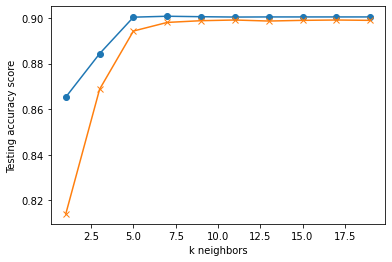

In [20]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

Based on the scores above, we will move forward with 5 neighbors for our model. 

In [ ]:
vaccine_df.head()

In [ ]:
vaccine_df = vaccine_df[['VAERS_ID', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_SITE']]
vaccine_df.head()

In [ ]:
# Combine overview with vaccine data  
merge1_df = pd.merge(overview_df, vaccine_df, how="left", on=["VAERS_ID", "VAERS_ID"])

In [ ]:
# Combine overview & vaccine with symptoms
merge2_df = pd.merge(merge1_df, symptoms_df, how="left", on=["VAERS_ID", "VAERS_ID"])
merge2_df.head()

In [ ]:
merge2_df.head()

In [ ]:
merge2_df.to_csv('training_data.csv')